# Single Cell RNA Seq Data Analysis using Seurat_part_1

In [1]:
install.packages("Seurat")


Installing package into ‘/home/jovyan/R/x86_64-conda-linux-gnu-library/4.3’
(as ‘lib’ is unspecified)



In [2]:
install.packages("hdf5r")


Installing package into ‘/home/jovyan/R/x86_64-conda-linux-gnu-library/4.3’
(as ‘lib’ is unspecified)



In [3]:
# https://www.kallistobus.tools/tutorials/kb_building_atlas/r/kb_analysis_0_r/

In [4]:
#loading package
library(Seurat)
library(tidyverse)
library(hdf5r)

Loading required package: SeuratObject

Loading required package: sp


Attaching package: ‘SeuratObject’


The following objects are masked from ‘package:base’:

    intersect, t


── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.2     ✔ tibble    3.3.0
✔ lubridate 1.9.4     ✔ tidyr     1.3.1
✔ purrr     1.1.0     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors

Attaching package: ‘hdf5r’


The following object is masked from ‘package:purrr’:

    flatten_df




In [5]:
# Read the full data from the .h5 file
counts <- Read10X_h5("/home/jovyan/40k_NSCLC_DTC_3p_HT_nextgem_Multiplex_count_raw_feature_bc_matrix.h5")


Genome matrix has multiple modalities, returning a list of matrices for this genome



In [6]:
# Check the structure of the counts object
str(counts)


List of 3
 $ Gene Expression     :Formal class 'dgCMatrix' [package "Matrix"] with 6 slots
  .. ..@ i       : int [1:150360352] 11692 26583 2510 8755 11717 13480 23180 29255 500 23118 ...
  .. ..@ p       : int [1:4387769] 0 2 8 12 15 15 17 19 22 22 ...
  .. ..@ Dim     : int [1:2] 36601 4387768
  .. ..@ Dimnames:List of 2
  .. .. ..$ : chr [1:36601] "MIR1302-2HG" "FAM138A" "OR4F5" "AL627309.1" ...
  .. .. ..$ : chr [1:4387768] "AAACCCAAGAAACACT-1" "AAACCCAAGAAACCAT-1" "AAACCCAAGAAACCCA-1" "AAACCCAAGAAACCCG-1" ...
  .. ..@ x       : num [1:150360352] 1 1 1 1 1 1 1 1 1 1 ...
  .. ..@ factors : list()
 $ Antibody Capture    :Formal class 'dgCMatrix' [package "Matrix"] with 6 slots
  .. ..@ i       : int [1:2221673] 7 1 4 0 0 1 2 3 4 6 ...
  .. ..@ p       : int [1:4387769] 0 1 1 1 1 1 1 1 2 2 ...
  .. ..@ Dim     : int [1:2] 9 4387768
  .. ..@ Dimnames:List of 2
  .. .. ..$ : chr [1:9] "CD3" "CD4.1" "CD8" "CD11c" ...
  .. .. ..$ : chr [1:4387768] "AAACCCAAGAAACACT-1" "AAACCCAAGAAACCAT-1"

In [7]:
# Extract gene expression data
gene_expression_matrix <- counts$`Gene Expression`

# Check the dimensions
dim(gene_expression_matrix)


[1]   36601 4387768

In [8]:
# Check the first few gene names
head(rownames(gene_expression_matrix))

# Check the first few cell IDs
head(colnames(gene_expression_matrix))


[1] "MIR1302-2HG" "FAM138A"     "OR4F5"       "AL627309.1"  "AL627309.3" 
[6] "AL627309.2"

[1] "AAACCCAAGAAACACT-1" "AAACCCAAGAAACCAT-1" "AAACCCAAGAAACCCA-1"
[4] "AAACCCAAGAAACCCG-1" "AAACCCAAGAAACGAA-1" "AAACCCAAGAAACTAC-1"

### Create a Seurat Object

In [9]:
# Create a Seurat object
#lung.seurat.obj <- CreateSeuratObject(counts = counts)
#lung.seurat.obj <- CreateSeuratObject(counts = counts, min.cells = 3, min.features = 200)
#str(lung.seurat.obj)
#lung.seurat.obj


# Create Seurat object using only gene expression data
lung.seurat.obj <- CreateSeuratObject(counts = gene_expression_matrix, project = "NSCLC", min.cells = 3, min.features = 200)

# Check the structure of the Seurat object
str(lung.seurat.obj)


Formal class 'Seurat' [package "SeuratObject"] with 13 slots
  ..@ assays      :List of 1
  .. ..$ RNA:Formal class 'Assay5' [package "SeuratObject"] with 8 slots
  .. .. .. ..@ layers    :List of 1
  .. .. .. .. ..$ counts:Formal class 'dgCMatrix' [package "Matrix"] with 6 slots
  .. .. .. .. .. .. ..@ i       : int [1:125873930] 23 24 64 142 187 395 442 495 517 618 ...
  .. .. .. .. .. .. ..@ p       : int [1:58987] 0 474 2283 4627 9387 17892 20194 21463 22782 25258 ...
  .. .. .. .. .. .. ..@ Dim     : int [1:2] 31117 58986
  .. .. .. .. .. .. ..@ Dimnames:List of 2
  .. .. .. .. .. .. .. ..$ : NULL
  .. .. .. .. .. .. .. ..$ : NULL
  .. .. .. .. .. .. ..@ x       : num [1:125873930] 1 1 1 2 1 1 2 2 3 2 ...
  .. .. .. .. .. .. ..@ factors : list()
  .. .. .. ..@ cells     :Formal class 'LogMap' [package "SeuratObject"] with 1 slot
  .. .. .. .. .. ..@ .Data: logi [1:58986, 1] TRUE TRUE TRUE TRUE TRUE TRUE ...
  .. .. .. .. .. .. ..- attr(*, "dimnames")=List of 2
  .. .. .. .. .. .. 

### Quality Control

In [10]:
# 1. QC -------
#View(lung.seurat.obj@meta.data)
# % MT reads
lung.seurat.obj[["percent.mt"]] <- PercentageFeatureSet(lung.seurat.obj, pattern = "^MT-")
#View(lung.seurat.obj@meta.data)

head(lung.seurat.obj@meta.data, 3)

orig.ident nCount_RNA nFeature_RNA percent.mt
AAACCCAAGAGGATCC-1 NSCLC       709        474         0.5641749 
AAACCCAAGAGTACCG-1 NSCLC      4562       1809         4.4498027 
AAACCCAAGATGGCGT-1 NSCLC      6897       2344         1.7833841

Warning message:
“Default search for "data" layer in "RNA" assay yielded no results; utilizing "counts" layer instead.”
Warning message:
“The `slot` argument of `FetchData()` is deprecated as of SeuratObject 5.0.0.
ℹ Please use the `layer` argument instead.
ℹ The deprecated feature was likely used in the Seurat package.
  Please report the issue at <https://github.com/satijalab/seurat/issues>.”
Warning message:
“`PackageCheck()` was deprecated in SeuratObject 5.0.0.
ℹ Please use `rlang::check_installed()` instead.
ℹ The deprecated feature was likely used in the Seurat package.
  Please report the issue at <https://github.com/satijalab/seurat/issues>.”


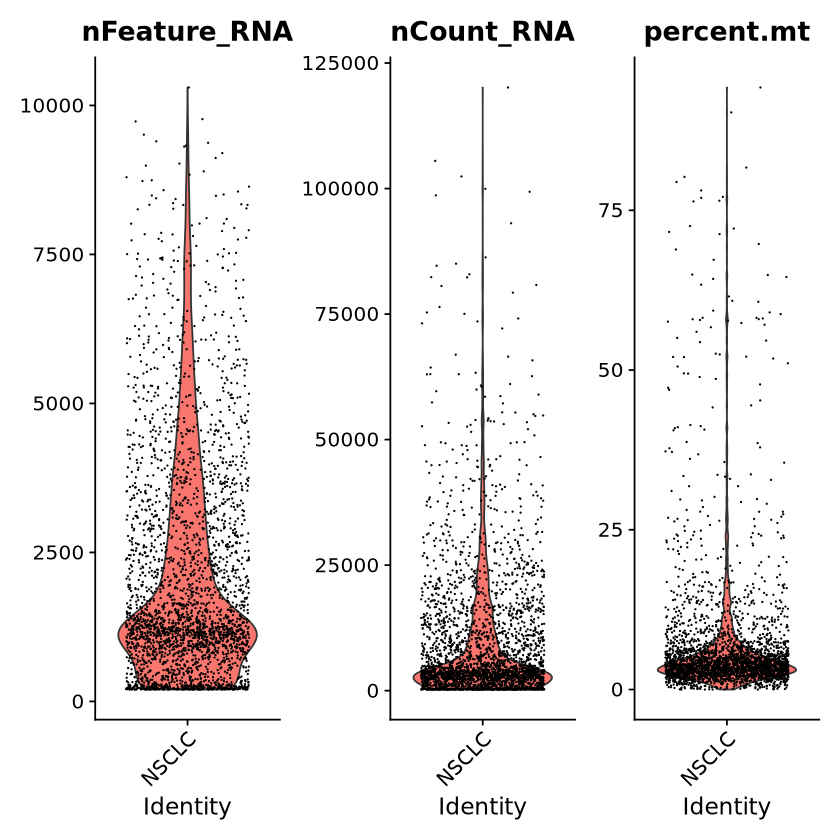

In [11]:
#Takes very long time to get the plot done
#VlnPlot(lung.seurat.obj, features = c("nFeature_RNA", "nCount_RNA", "percent.mt"), ncol = 3)

# nFeature_RNA refers to the number of genes detected in each cell.
#Count_RNA metric in Seurat refers to the total number of RNA molecules (or reads) detected in a cell.
#High nCount_RNA: Could indicate a high level of gene expression, but it could also reflect a larger cell size or cells that are stressed or in a unique biological state.

#percent.mt refers to the percentage of mitochondrial genes in each cell.

# Subsample 5% of the cells for the plot
set.seed(123)
subset_cells <- sample(Cells(lung.seurat.obj), size = 0.05 * length(Cells(lung.seurat.obj)))  # 5% of cells


# Create a subset Seurat object
lung.seurat.obj <- subset(lung.seurat.obj, cells = subset_cells)

# Plot the violin plot on the subset
VlnPlot(lung.seurat.obj, features = c("nFeature_RNA", "nCount_RNA", "percent.mt"), ncol = 3, pt.size = 0.001)



In [12]:
# Quality control and filtering

lung.seurat.obj <- subset(lung.seurat.obj, subset = nFeature_RNA > 200 & nFeature_RNA < 2500 & percent.mt < 5)

head(lung.seurat.obj)

orig.ident nCount_RNA nFeature_RNA percent.mt
AAACCCAGTCGCATGC-1 NSCLC      3375       1062         4.1777778 
AAACGAACATACAGAA-1 NSCLC      3662       1244         3.1403605 
AAACGAATCTCTATAC-1 NSCLC       245        206         2.4489796 
AAACGCTAGGTTACCT-1 NSCLC      3028       1019         4.4583884 
AAAGAACAGTTGGCTT-1 NSCLC       292        230         2.0547945 
AAAGAACTCCCAGGAC-1 NSCLC       436        339         3.2110092 
AAAGGATAGATGTTGA-1 NSCLC      5018       1107         0.2391391 
AAAGGATCAACACGAG-1 NSCLC       892        491         4.9327354 
AAAGGATTCATTTGGG-1 NSCLC      3729       1108         4.1566104 
AAAGGATTCGAGCTGC-1 NSCLC      3922       1201         3.1361550

### Normalization

In [13]:
# Normalize data
lung.seurat.obj <- NormalizeData(lung.seurat.obj, normalization.method = "LogNormalize", scale.factor = 10000)

Normalizing layer: counts



### Feature Selection: Identify variable features for downstream analysis

In [14]:
# Find highly variable features first
lung.seurat.obj <- FindVariableFeatures(lung.seurat.obj, selection.method = "vst", nfeatures = 2000)

# Now, check the top 10 variable features
#top10 <- head(VariableFeatures(lung.seurat.obj), 10)

# Create the variable feature plot again
#plot1 <- VariableFeaturePlot(lung.seurat.obj, pt.size = 0.001)

# Customize the plot using theme() to reduce margins or text size
#plot1 <- plot1 + theme(
#  plot.margin = margin(5, 5, 5, 5),     # Reduce plot margins
#  text = element_text(size = 9)          # Reduce text size (optional)
#)

# Label the top 10 variable genes
#plot1 <- LabelPoints(plot = plot1, points = top10, repel = TRUE)

# Display the plot
#plot1

Finding variable features for layer counts



In [15]:
# Extract the names of all highly variable features
all_var_features <- VariableFeatures(lung.seurat.obj)

# Calculate the number of top features to keep (100% of the total)
top_10_percent <- floor(length(all_var_features) * 1)

# Select the top 10% of variable features
top_10_var_features <- all_var_features[1:top_10_percent]

# Subset Seurat object to include only the top 10% variable features
lung.seurat.obj <- lung.seurat.obj[top_10_var_features, ]


When using repel, set xnudge and ynudge to 0 for optimal results



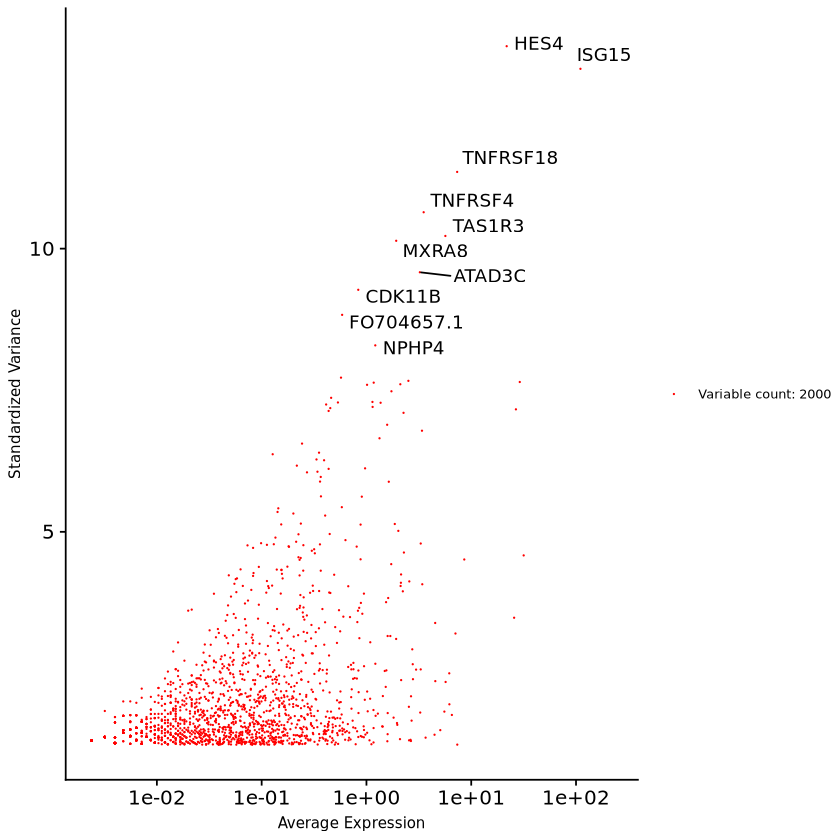

In [16]:
library(ggplot2)
# Now, check the top 10 variable features
top10 <- head(VariableFeatures(lung.seurat.obj), 10)

# Create the variable feature plot again
plot1 <- VariableFeaturePlot(lung.seurat.obj, pt.size = 0.001)

# Customize the plot using theme() to reduce margins or text size
plot1 <- plot1 + theme(
  plot.margin = margin(5, 5, 5, 5),     # Reduce plot margins
  text = element_text(size = 9)          # Reduce text size (optional)
)

# Label the top 10 variable genes
plot1 <- LabelPoints(plot = plot1, points = top10, repel = TRUE)

# Display the plot
plot1

### Scaling

In [17]:
# Scale the data
lung.seurat.obj <- ScaleData(lung.seurat.obj, features = rownames(lung.seurat.obj))

Centering and scaling data matrix



### Dimentionality Reduction

In [18]:
# Perform PCA
lung.seurat.obj <- RunPCA(lung.seurat.obj, features = VariableFeatures(lung.seurat.obj))

PC_ 1 
Positive:  AIF1, CD68, TYROBP, OLR1, PLAUR, NCF2, FCGR2A, IFI30, C15orf48, FCER1G 
	   S100A9, SMIM25, TREM1, CST3, CD14, VCAN, SPI1, C5AR1, DMXL2, PLXDC2 
	   THBD, MS4A6A, EREG, NPC2, AQP9, TGFBI, IGSF6, LILRB4, SLC16A10, AC020656.1 
Negative:  IL32, CD69, LTB, CCL5, TRBC1, IL7R, CD7, KLRB1, ITM2A, GZMA 
	   CD27, ICOS, TIGIT, IFNG, BATF, CD247, GATA3, TNFRSF4, GZMK, CTSW 
	   IGKC, KLRK1, GZMH, CD8A, LINC01871, GIMAP7, FKBP11, NKG7, KLRD1, TNFRSF18 
PC_ 2 
Positive:  EFEMP2, CALD1, C1R, AEBP1, NNMT, COL10A1, ANTXR1, LAMA4, EMILIN1, MXRA5 
	   MXRA8, FAP, PLAC9, PRRX1, DCN, BGN, COL6A3, TIMP3, RARRES2, MMP11 
	   ADAMTS12, COL5A1, FBN1, C11orf96, GGT5, CTHRC1, CCDC80, SERPING1, TAGLN, MMP2 
Negative:  CD69, CREM, CLEC2B, TXNIP, RGS1, LTB, CCL5, S100A4, GPR183, DUSP4 
	   GPR65, RGCC, IL7R, CST7, CD7, METRNL, ZEB2, NR4A2, CD74, CD83 
	   ITGB2, BCL2A1, EIF4A3, PLIN2, TNFRSF1B, NKG7, HLA-DPA1, NR3C1, TRBC1, HLA-DPB1 
PC_ 3 
Positive:  IL32, CCL5, CD7, CST7, CLEC2B, IL7R, NKG7, S

In [ ]:
# Visualise PCA with top 5 features
print(lung.seurat.obj[["pca"]], dims = 1:5, nfeatures = 5)


#visualizing the PCA heatmap for the first PC using 500 cells
DimHeatmap(lung.seurat.obj, dims = 1, cells = 500, balanced = TRUE)

#Save heatmap to PNG but do NOT print to notebook
invisible(
  png("PCA_heatmap_PC1.png", width = 1000, height = 700)
)


PC_ 1 
Positive:  AIF1, CD68, TYROBP, OLR1, PLAUR 
Negative:  IL32, CD69, LTB, CCL5, TRBC1 
PC_ 2 
Positive:  EFEMP2, CALD1, C1R, AEBP1, NNMT 
Negative:  CD69, CREM, CLEC2B, TXNIP, RGS1 
PC_ 3 
Positive:  IL32, CCL5, CD7, CST7, CLEC2B 
Negative:  MS4A1, HLA-DRA, BANK1, IGKC, CD79A 
PC_ 4 
Positive:  SPP1, FTL, S100A11, KRT19, S100A9 
Negative:  MS4A1, MEF2C, CD79A, BANK1, IRF8 
PC_ 5 
Positive:  EGLN3, AKR1C1, SLC7A11, CALML5, GPX2 
Negative:  VCAN, TNFAIP6, DCN, EFEMP2, COL1A2 


In [ ]:
# Save Seurat object to disk
saveRDS(lung.seurat.obj, file = "lung_seurat_NSCLC.rds")